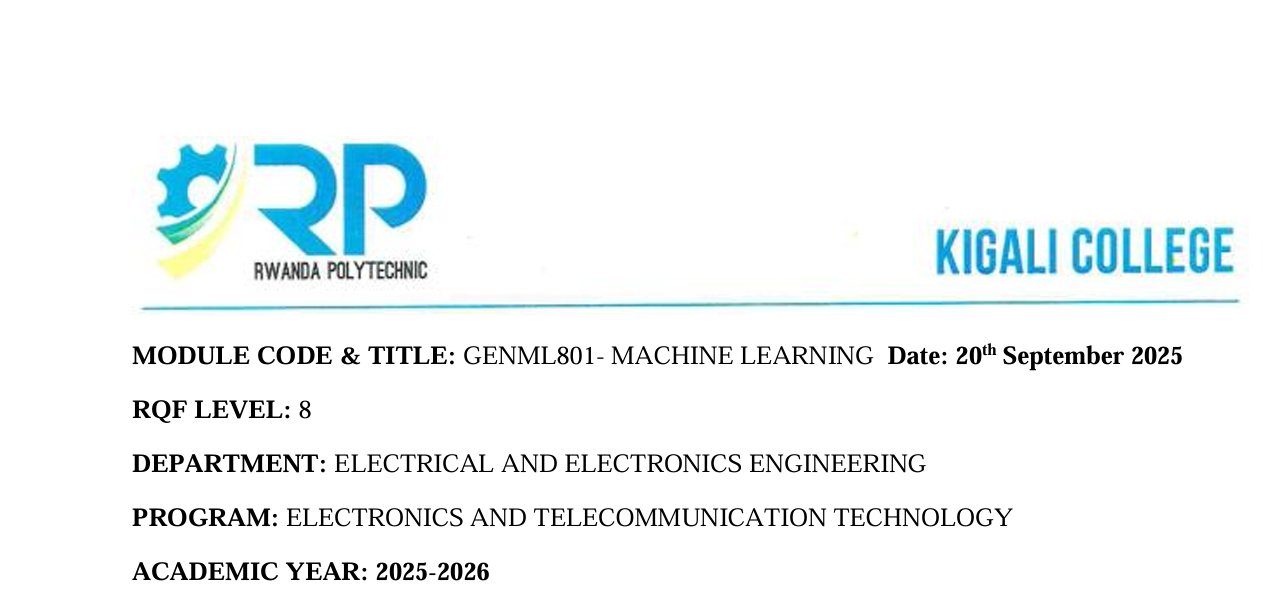

##### NAMES: TUYISHIME Emmanuel
##### REG NO: 25RP18085

## TITLE: FLOOD PREDICTION

# Step 1: Setup and Load Dataset
In this step, I imported Python libraries for data analysis and machine learning. Pandas and NumPy were used for handling the dataset, Matplotlib and Seaborn for visualizations, and Scikit-learn for preprocessing, model building, and evaluation. and also joblib was used to save model

In [7]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set(style='whitegrid')

## Load Dataset
Here I loaded the airquality dataset into a pandas DataFrame called df. The dataset contains daily air quality measurements (Ozone, Solar Radiation, Wind, Temp, Month, Day). The .head() function displays the first 5 rows to inspect the data.

In [8]:
csv_path = r"C:\Users\user\Desktop\flood_pre\sample_flood_dataset.csv"  # adjust path if needed
df = pd.read_csv(csv_path)
df['occured'].value_counts()
df.head()

,Rainfall_mm,Temperature_c,Humidity_percent,Latitude,Longitude,occured
0,5,25,60,-1.9,29.7,0
1,15,23,80,-1.9,29.7,1
2,0,28,50,-1.9,29.7,0
3,30,22,90,-1.9,29.7,1
4,12,24,70,-1.9,29.7,1


In [9]:
csv_path = r"C:\Users\user\Desktop\flood_pre\sample_flood_dataset.csv"  # adjust path if needed
df = pd.read_csv(csv_path)
df['occured'].value_counts()
df.head()

,Rainfall_mm,Temperature_c,Humidity_percent,Latitude,Longitude,occured
0,5,25,60,-1.9,29.7,0
1,15,23,80,-1.9,29.7,1
2,0,28,50,-1.9,29.7,0
3,30,22,90,-1.9,29.7,1
4,12,24,70,-1.9,29.7,1


## Step 2: Exploratory Data Analysis (EDA)
## Basic Info and Statistics
This shows the dataset’s size, data types, and summary statistics and duplicates. It helps to quickly understand the structure of the dataset.

In [10]:
# Cell 4 - Summary statistics and duplicates
display(df.describe(include='all').T)
print('\nNumber of duplicate rows:', df.duplicated().sum())

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,20.0,9.80,9.277023e+00,0.0,1.75,7.5,15.75,30.0
Temperature_c,20.0,24.75,2.359193e+00,21.0,23.00,24.5,27.00,28.0
Humidity_percent,20.0,67.55,1.375146e+01,50.0,55.00,65.0,80.00,90.0
Latitude,20.0,-1.90,6.834389e-16,-1.9,-1.90,-1.9,-1.90,-1.9
Longitude,20.0,29.70,0.000000e+00,29.7,29.70,29.7,29.70,29.7
occured,20.0,0.50,5.129892e-01,0.0,0.00,0.5,1.00,1.0



Number of duplicate rows: 7


Using target column: occured

Target value counts:


occured
0    10
1    10
Name: count, dtype: int64

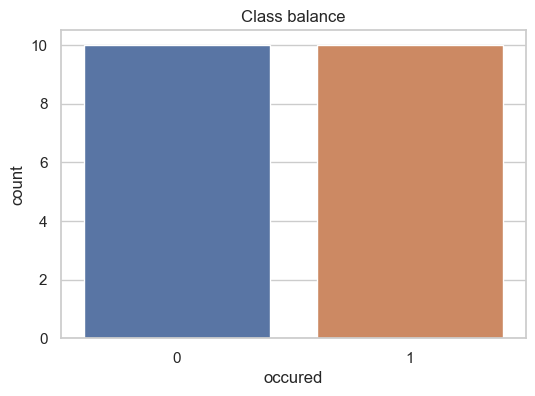

In [11]:
target_col = df.columns[-1]
print('Using target column:', target_col)
print('\nTarget value counts:')
display(df[target_col].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Class balance')
plt.show()

In [12]:
X = df.drop(columns=[target_col]).copy()
y_raw = df[target_col].copy()

if y_raw.dtype == 'O' or y_raw.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y_raw.astype(str))
    print('Target classes (label encoder):', list(le.classes_))
else:
    y = y_raw.astype(int).values

print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (20, 5) y shape: (20,)


In [13]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)

Numeric features: ['Rainfall_mm', 'Temperature_c', 'Humidity_percent', 'Latitude', 'Longitude']
Categorical features: []


# Univariate EDA: histograms and boxplots for numeric features

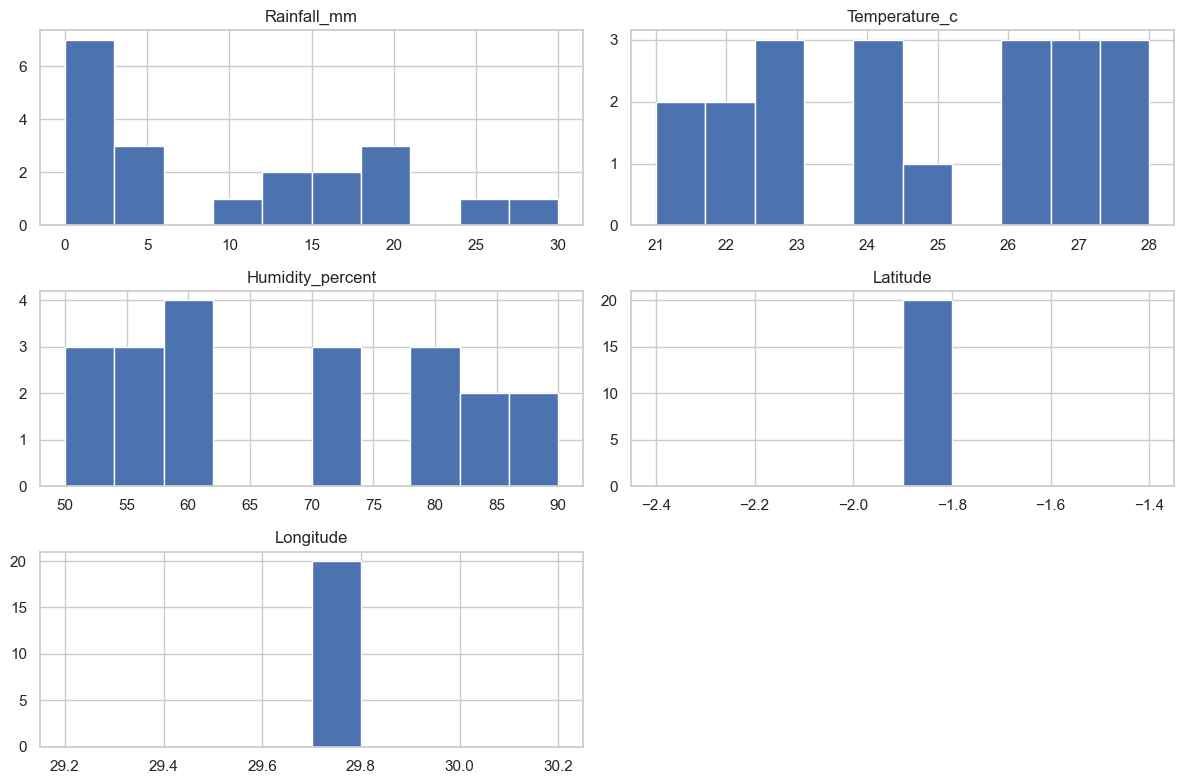

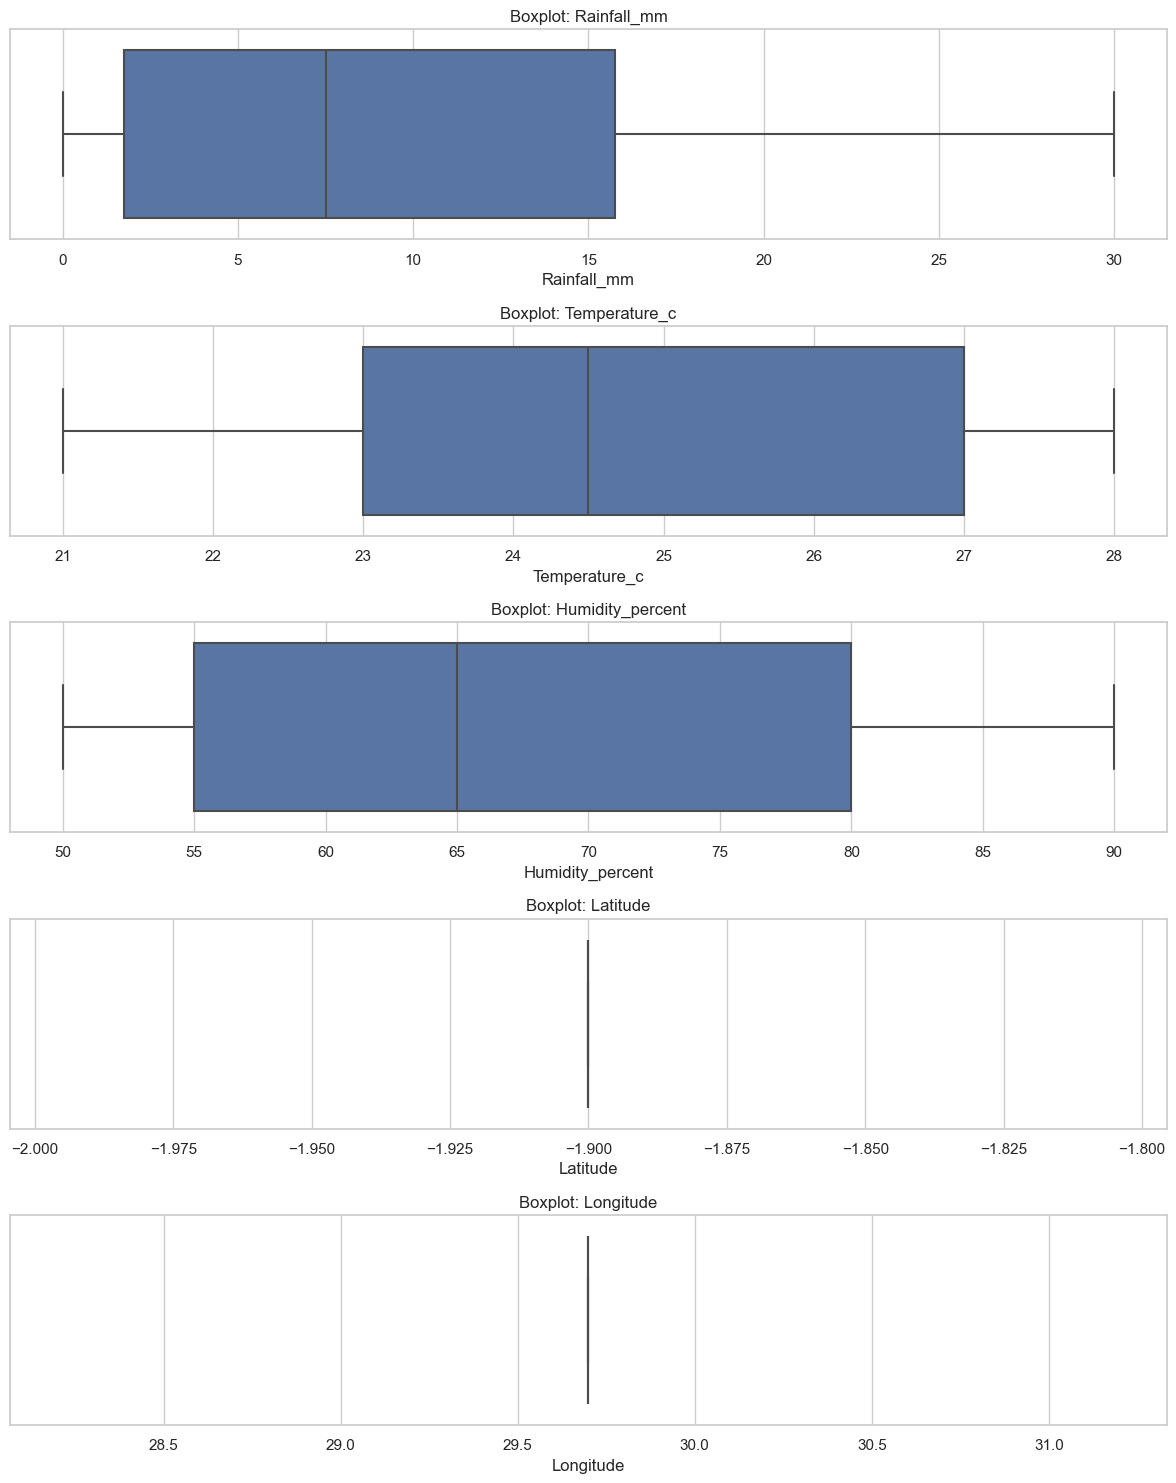

In [14]:
if len(numeric_features) > 0:
    X[numeric_features].hist(figsize=(12,8))
    plt.tight_layout()
    plt.show()

    n_show = min(6, len(numeric_features))
    plt.figure(figsize=(12, 3*n_show))
    for i, col in enumerate(numeric_features[:n_show], 1):
        plt.subplot(n_show,1,i)
        sns.boxplot(x=X[col])
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric features found.')

## Bivariate EDA: numeric vs target and categorical vs target
numeric vs target (violin or box)


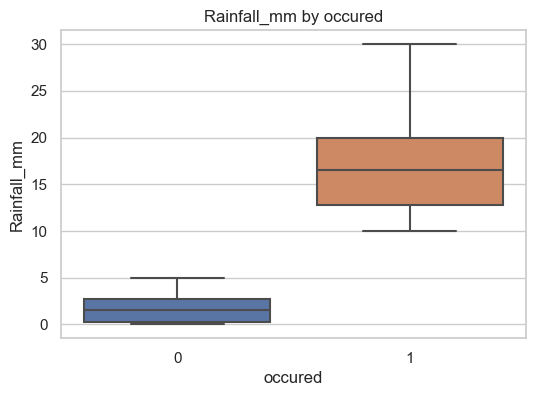

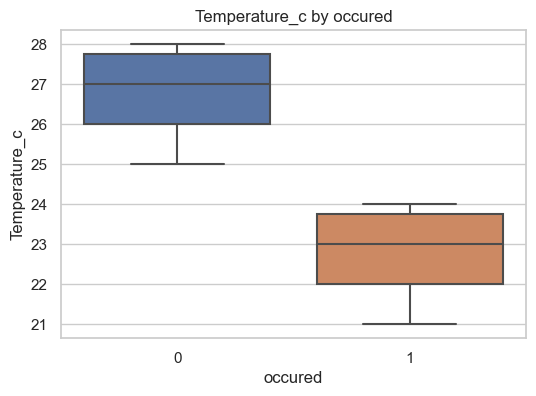

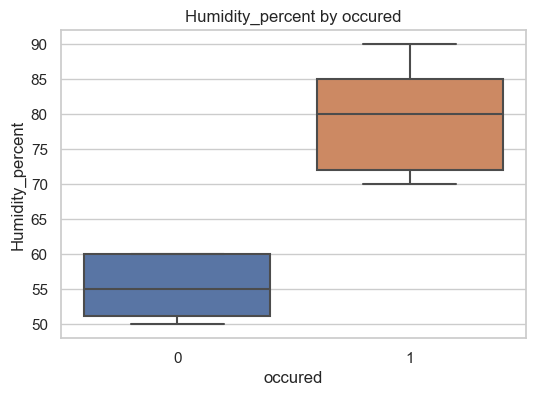

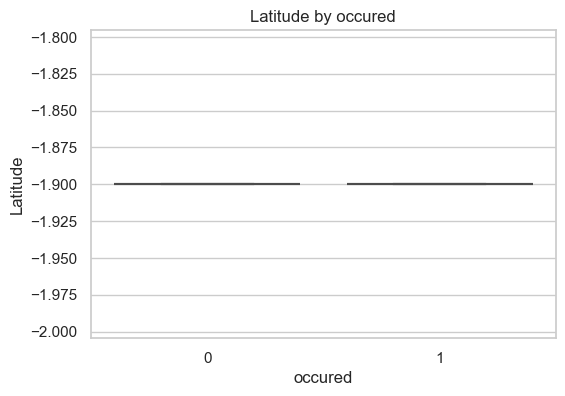

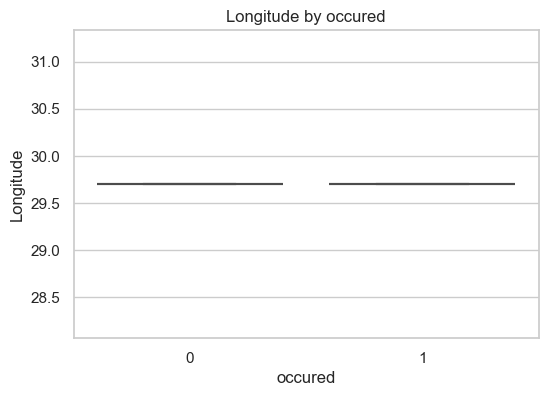

In [15]:
for col in numeric_features[:6]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target_col], y=df[col])
    plt.title(f'{col} by {target_col}')
    plt.show()

for col in categorical_features[:6]:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f'{col} counts by {target_col}')
    plt.show()

## Multivariate EDA: correlations & pairplot (limited)
 Correlation heatmap for numeric features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


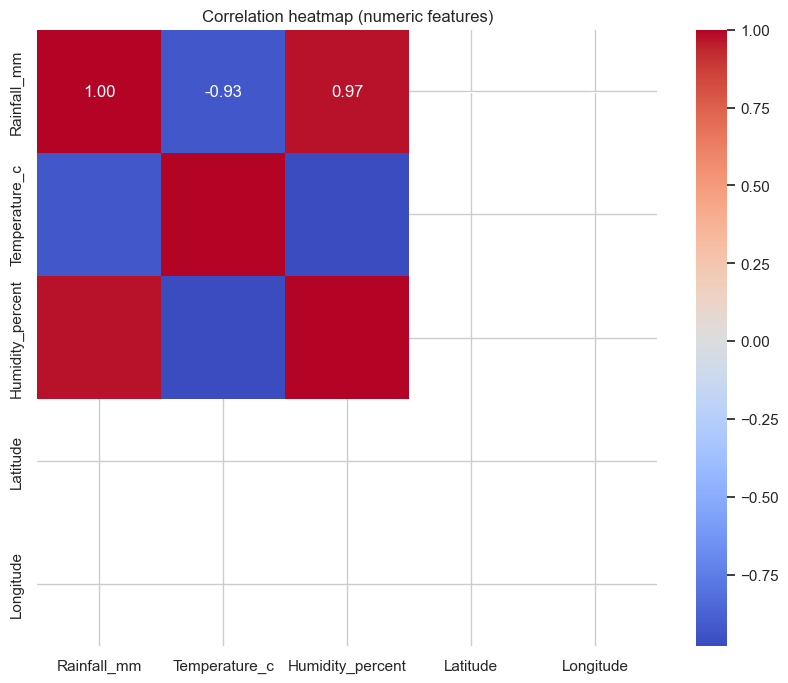

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

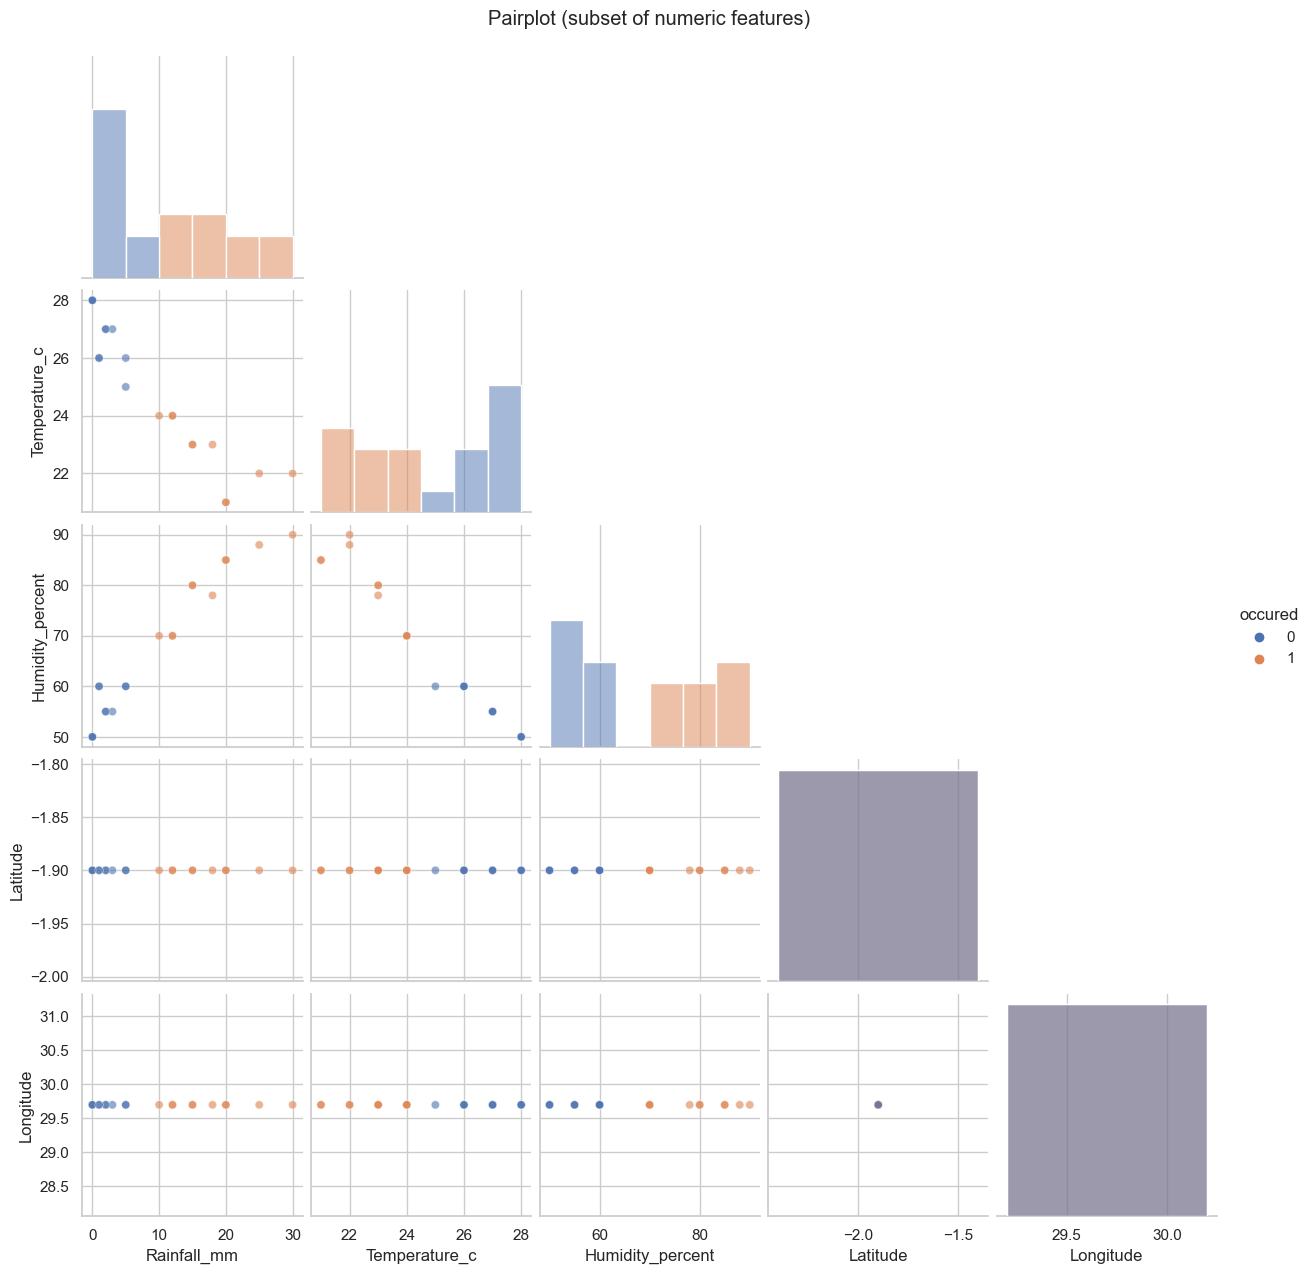

In [16]:
if len(numeric_features) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_features].corr(), cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Correlation heatmap (numeric features)')
    plt.show()

pp_features = numeric_features[:6]
if len(pp_features) > 1:
    sns.pairplot(df[pp_features + [target_col]], hue=target_col, corner=True, diag_kind='hist', plot_kws={'alpha':0.6})
    plt.suptitle('Pairplot (subset of numeric features)', y=1.02)
    plt.show()
else:
    print('Not enough numeric features for pairplot.')

## Step 3: Feature Engineering

I first checked whether the dataset contained any missing values. This is important because machine learning models cannot handle empty or undefined data properly.

In [17]:
print('Missing values per column:')
print(df.isna().sum())

print('\nBasic imputation plan:')
print('- Numeric: impute with median')
print('- Categorical: impute with most frequent (mode)')

Missing values per column:
Rainfall_mm         0
Temperature_c       0
Humidity_percent    0
Latitude            0
Longitude           0
occured             0
dtype: int64

Basic imputation plan:
- Numeric: impute with median
- Categorical: impute with most frequent (mode)


## Define Features and Preprocessing Pipelines

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

X_pre = preprocessor.fit_transform(X)
print('Shape after preprocessing:', X_pre.shape)

Shape after preprocessing: (20, 5)


## Outlier handling:

In [19]:
X_cap = X.copy()
for col in numeric_features:
    lower = X_cap[col].quantile(0.01)
    upper = X_cap[col].quantile(0.99)
    X_cap[col] = X_cap[col].clip(lower=lower, upper=upper)

if len(numeric_features) > 0:
    col = numeric_features[0]
    print('Before capping:', X[col].describe().to_frame().T)
    print('\nAfter capping:', X_cap[col].describe().to_frame().T)

Before capping:              count  mean       std  min   25%  50%    75%   max
Rainfall_mm   20.0   9.8  9.277023  0.0  1.75  7.5  15.75  30.0

After capping:              count    mean       std  min   25%  50%    75%    max
Rainfall_mm   20.0  9.7525  9.169966  0.0  1.75  7.5  15.75  29.05


## Build preprocessing pipelines

Cumulative variance (first 10): [0.972 0.996 1.    1.    1.   ]
Chosen n_components for PCA: 1
X_pca shape: (20, 1)


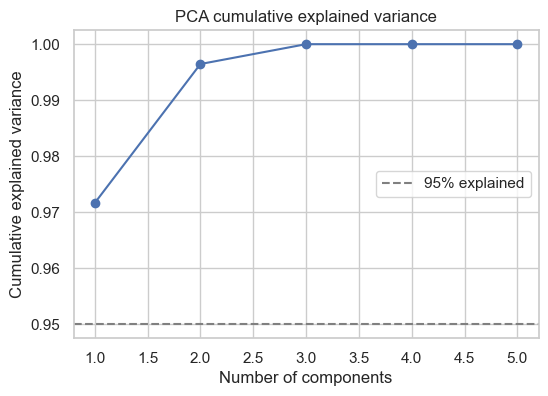

In [20]:
pca_full = PCA()
pca_full.fit(X_pre)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.searchsorted(cum_var, 0.95) + 1
n_components = min(n_components, 10, X_pre.shape[1])
print('Cumulative variance (first 10):', np.round(cum_var[:10],3))
print('Chosen n_components for PCA:', n_components)

pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_pre)
print('X_pca shape:', X_pca.shape)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(0.95, color='gray', linestyle='--', label='95% explained')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA cumulative explained variance')
plt.legend()
plt.show()

## Step 4: Modeling
## Train logistic Regression and Random forest
I trained a baseline Linear Regression model using the preprocessing pipeline. and also i trained random forest 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
print('Train shapes:', X_train.shape, y_train.shape)
print('Test shapes:', X_test.shape, y_test.shape)

Train shapes: (16, 1) (16,)
Test shapes: (4, 1) (4,)


In [22]:
lr = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
print('Both models trained.')

Both models trained.


## Step 5: model evaluation 

The model evaluation step is the process of checking how well a trained machine learning model performs on both the training data and unseen test data.


Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion matrix:
 [[2 0]
 [0 2]]


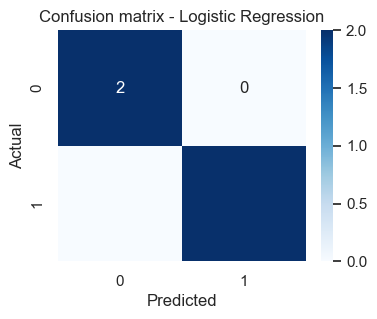


Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion matrix:
 [[2 0]
 [0 2]]


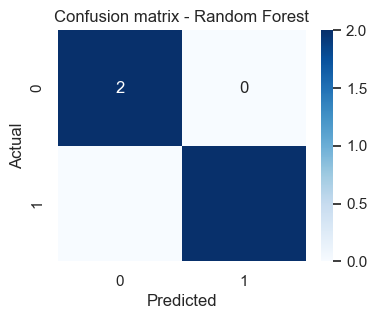

In [23]:
models = {'Logistic Regression': lr, 'Random Forest': rf}

for name, model in models.items():
    print('\n' + '='*40)
    print('Model:', name)
    y_pred = model.predict(X_test)
    print('Accuracy:', round(accuracy_score(y_test, y_pred),4))
    print('Precision:', round(precision_score(y_test, y_pred, zero_division=0),4))
    print('Recall:', round(recall_score(y_test, y_pred, zero_division=0),4))
    print('F1 score:', round(f1_score(y_test, y_pred, zero_division=0),4))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n', cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Step 6 :Saving Model
The trained Random Forest pipeline was saved using Joblib. This allows reusing the model later in deployment without retraining.

In [24]:
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(pca, 'pca.joblib')
joblib.dump(lr, 'lr_model.joblib')
joblib.dump(rf, 'rf_model.joblib')
print('Saved artifacts: preprocessor.joblib, pca.joblib, lr_model.joblib, rf_model.joblib')

Saved artifacts: preprocessor.joblib, pca.joblib, lr_model.joblib, rf_model.joblib


In [25]:
loaded_pre = joblib.load('preprocessor.joblib')
loaded_pca = joblib.load('pca.joblib')
loaded_model = joblib.load('rf_model.joblib')  # or 'lr_model.joblib'

##new_row = { 'feature1': val1, 'feature2': val2, ... }
# new_df = pd.DataFrame([new_row])
# X_new_pre = loaded_pre.transform(new_df)
# X_new_pca = loaded_pca.transform(X_new_pre)
# pred = loaded_model.predict(X_new_pca)
# print('Prediction:', pred)

## Step 7: Model deployment 

Save the snippet below to a file named `app.py` and run `streamlit run app.py` to launch a simple app. Replace field names where necessary.

In [26]:
# Streamlit app snippet (save as app.py)
streamlit_code = """
import streamlit as st
import joblib
import pandas as pd

st.title('Flood Prediction Demo')

pre = joblib.load('preprocessor.joblib')
pca = joblib.load('pca.joblib')
model = joblib.load('rf_model.joblib')

uploaded = st.file_uploader('Upload CSV with same feature columns', type=['csv'])
if uploaded is not None:
    df_new = pd.read_csv(uploaded)
    X_new_pre = pre.transform(df_new)
    X_new_pca = pca.transform(X_new_pre)
    preds = model.predict(X_new_pca)
    df_new['prediction'] = preds
    st.dataframe(df_new)
    st.write('Predictions added as column `prediction` (0 = no flood, 1 = flood)')
"""

with open('app.py', 'w') as f:
    f.write(streamlit_code)

print('Wrote app.py (Streamlit app). Run: streamlit run app.py')

Wrote app.py (Streamlit app). Run: streamlit run app.py
